Epoch: 0, D loss: 2.0725, G loss: 0.4085


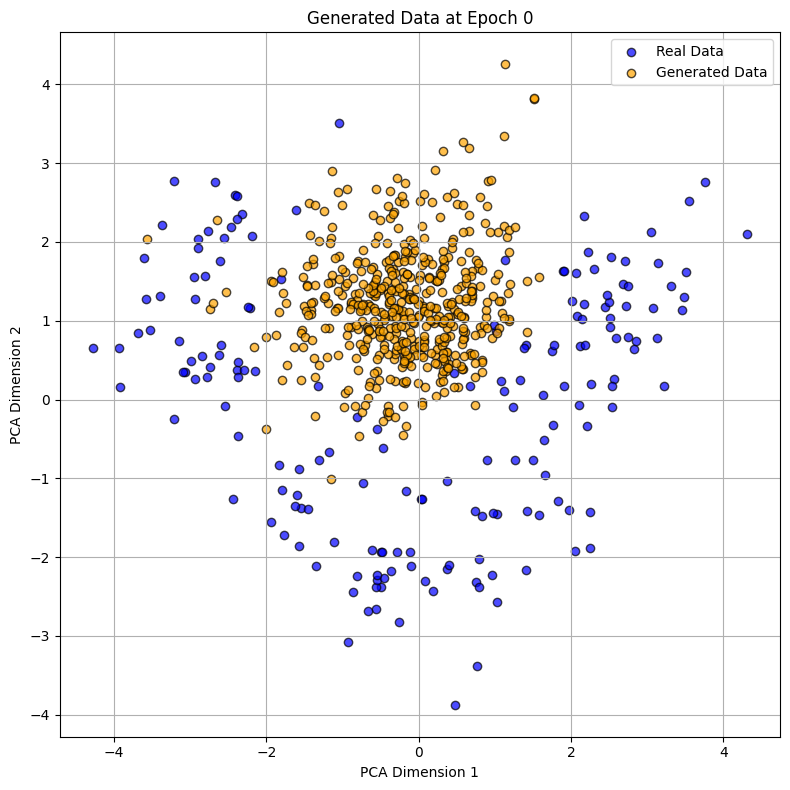

Epoch: 500, D loss: 2.0876, G loss: 0.3758
Epoch: 1000, D loss: 1.7797, G loss: 0.6264
Epoch: 1500, D loss: 1.5469, G loss: 0.7637
Epoch: 2000, D loss: 1.3829, G loss: 0.9029
Epoch: 2500, D loss: 1.2626, G loss: 0.9532
Epoch: 3000, D loss: 1.0678, G loss: 1.0258
Epoch: 3500, D loss: 0.9761, G loss: 1.1066
Epoch: 4000, D loss: 0.9313, G loss: 1.2224
Epoch: 4500, D loss: 0.8272, G loss: 1.3349
Epoch: 5000, D loss: 0.7635, G loss: 1.4798
Epoch: 5500, D loss: 0.6915, G loss: 1.5095
Epoch: 6000, D loss: 0.6574, G loss: 1.5606
Epoch: 6500, D loss: 0.6626, G loss: 1.6347
Epoch: 7000, D loss: 0.6453, G loss: 1.6302
Epoch: 7500, D loss: 0.6337, G loss: 1.5330
Epoch: 8000, D loss: 0.6284, G loss: 1.6156
Epoch: 8500, D loss: 0.5894, G loss: 1.6559
Epoch: 9000, D loss: 0.5867, G loss: 1.6858
Epoch: 9500, D loss: 0.5736, G loss: 1.7509
Epoch: 10000, D loss: 0.5487, G loss: 1.8042


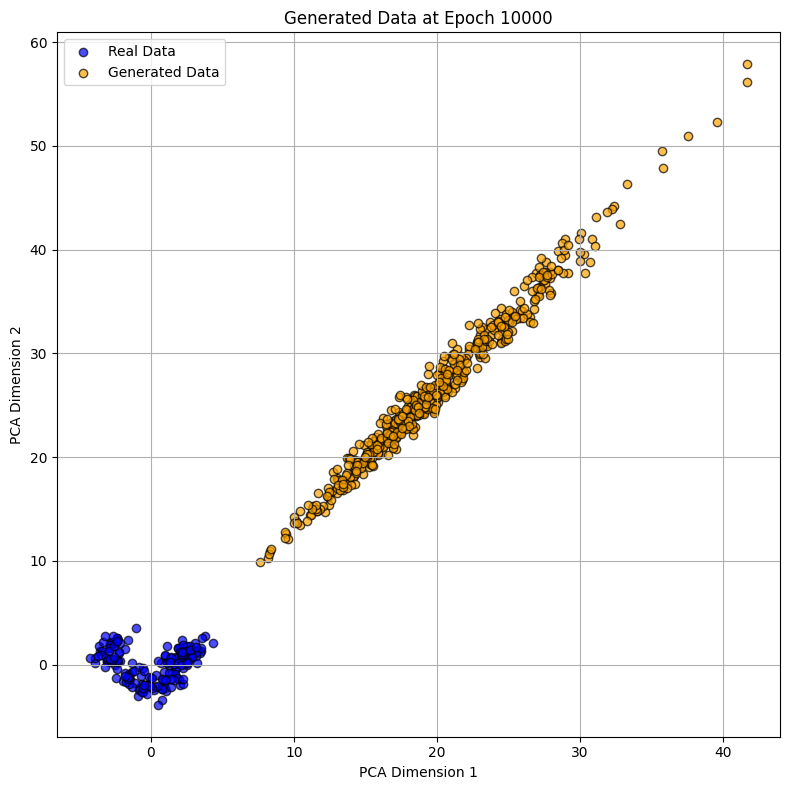

Epoch: 10500, D loss: 0.5400, G loss: 1.8294
Epoch: 11000, D loss: 0.5487, G loss: 1.8202
Epoch: 11500, D loss: 0.5273, G loss: 1.8554
Epoch: 12000, D loss: 0.5264, G loss: 1.8701
Epoch: 12500, D loss: 0.5072, G loss: 1.9118
Epoch: 13000, D loss: 0.5235, G loss: 1.9756
Epoch: 13500, D loss: 0.5083, G loss: 1.9798
Epoch: 14000, D loss: 0.4973, G loss: 2.0219
Epoch: 14500, D loss: 0.4951, G loss: 2.0574
Epoch: 15000, D loss: 0.5080, G loss: 2.0638
Epoch: 15500, D loss: 0.4891, G loss: 2.0540
Epoch: 16000, D loss: 0.4817, G loss: 2.1105
Epoch: 16500, D loss: 0.5023, G loss: 2.1511
Epoch: 17000, D loss: 0.4966, G loss: 2.1128
Epoch: 17500, D loss: 0.5113, G loss: 2.1243
Epoch: 18000, D loss: 0.4652, G loss: 2.1656
Epoch: 18500, D loss: 0.4596, G loss: 2.1528
Epoch: 19000, D loss: 0.4836, G loss: 2.1652
Epoch: 19500, D loss: 0.4512, G loss: 2.2065
Epoch: 20000, D loss: 0.4876, G loss: 2.2184


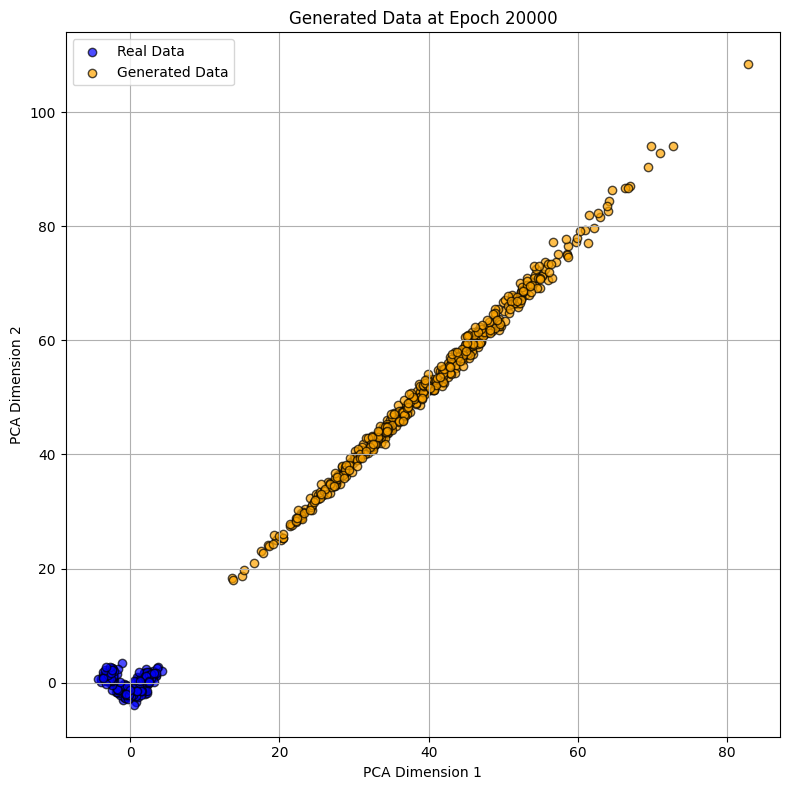

Epoch: 20500, D loss: 0.4923, G loss: 2.1923
Epoch: 21000, D loss: 0.4714, G loss: 2.2011
Epoch: 21500, D loss: 0.5035, G loss: 2.1846
Epoch: 22000, D loss: 0.4614, G loss: 2.2783
Epoch: 22500, D loss: 0.5011, G loss: 2.2101
Epoch: 23000, D loss: 0.4626, G loss: 2.2365
Epoch: 23500, D loss: 0.4587, G loss: 2.2542
Epoch: 24000, D loss: 0.4744, G loss: 2.2544
Epoch: 24500, D loss: 0.4631, G loss: 2.2890
Epoch: 25000, D loss: 0.4742, G loss: 2.2640
Epoch: 25500, D loss: 0.4452, G loss: 2.2702
Epoch: 26000, D loss: 0.4750, G loss: 2.3042
Epoch: 26500, D loss: 0.4789, G loss: 2.3055
Epoch: 27000, D loss: 0.4747, G loss: 2.3104
Epoch: 27500, D loss: 0.4738, G loss: 2.3607
Epoch: 28000, D loss: 0.4739, G loss: 2.3307
Epoch: 28500, D loss: 0.4791, G loss: 2.3245
Epoch: 29000, D loss: 0.4788, G loss: 2.3319
Epoch: 29500, D loss: 0.4800, G loss: 2.3360
Epoch: 30000, D loss: 0.4429, G loss: 2.3931


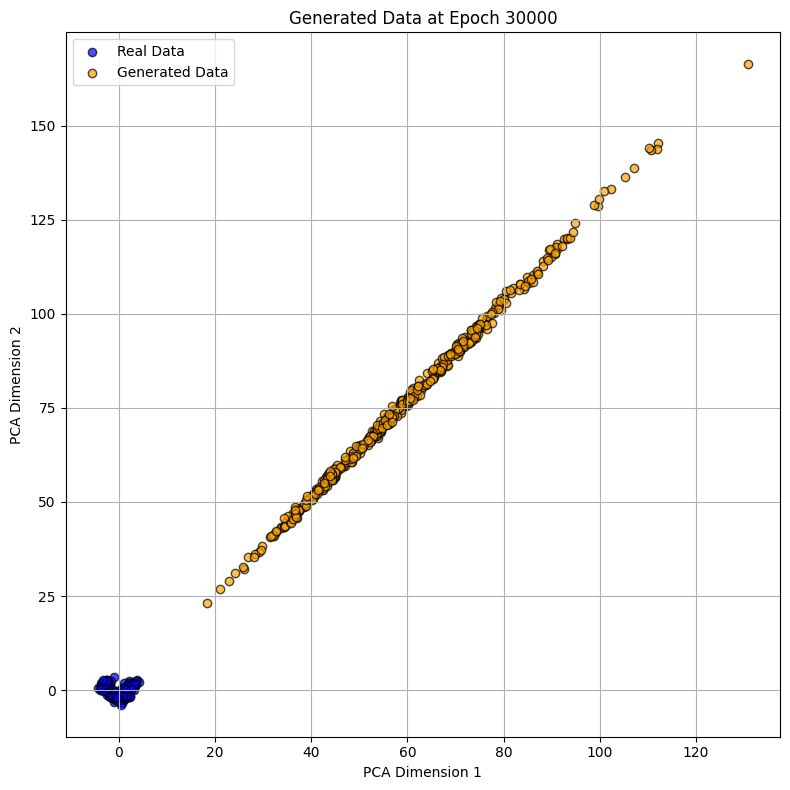

Epoch: 30500, D loss: 0.4792, G loss: 2.3670
Epoch: 31000, D loss: 0.4504, G loss: 2.3920
Epoch: 31500, D loss: 0.4829, G loss: 2.3723
Epoch: 32000, D loss: 0.4711, G loss: 2.3751
Epoch: 32500, D loss: 0.4712, G loss: 2.3585
Epoch: 33000, D loss: 0.4680, G loss: 2.3699
Epoch: 33500, D loss: 0.4591, G loss: 2.4279
Epoch: 34000, D loss: 0.4869, G loss: 2.4251
Epoch: 34500, D loss: 0.4594, G loss: 2.3316
Epoch: 35000, D loss: 0.4589, G loss: 2.3375
Epoch: 35500, D loss: 0.4786, G loss: 2.3421
Epoch: 36000, D loss: 0.4806, G loss: 2.3441
Epoch: 36500, D loss: 0.4517, G loss: 2.3270
Epoch: 37000, D loss: 0.4852, G loss: 2.3146
Epoch: 37500, D loss: 0.4460, G loss: 2.3547
Epoch: 38000, D loss: 0.4838, G loss: 2.3334
Epoch: 38500, D loss: 0.4525, G loss: 2.3623
Epoch: 39000, D loss: 0.4674, G loss: 2.3444
Epoch: 39500, D loss: 0.4731, G loss: 2.3081
Epoch: 40000, D loss: 0.4778, G loss: 2.3575


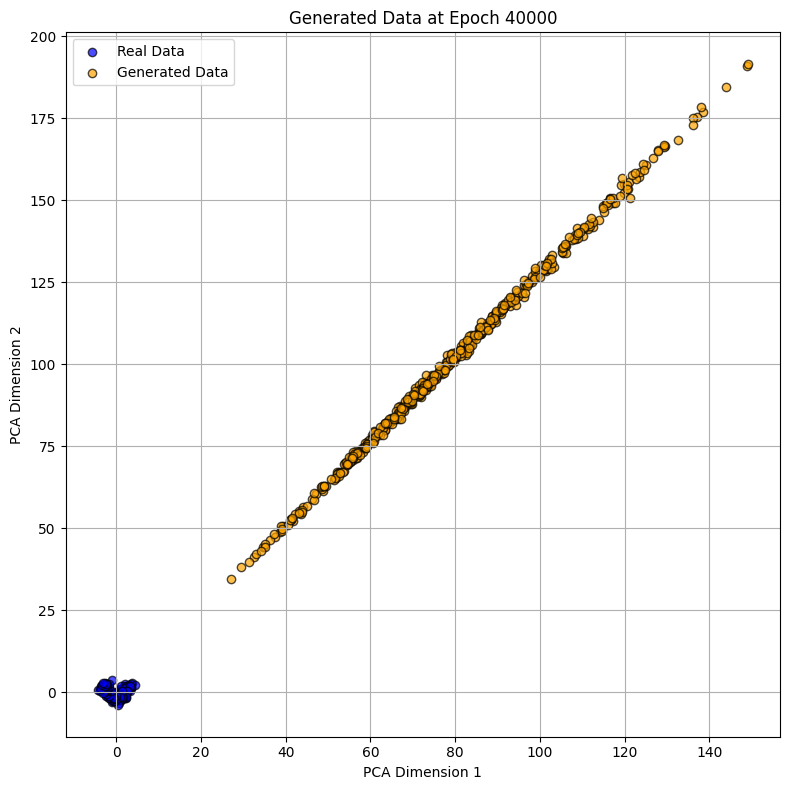

Epoch: 40500, D loss: 0.4828, G loss: 2.3576
Epoch: 41000, D loss: 0.4796, G loss: 2.3649
Epoch: 41500, D loss: 0.4855, G loss: 2.3592
Epoch: 42000, D loss: 0.4833, G loss: 2.3678
Epoch: 42500, D loss: 0.4740, G loss: 2.3569
Epoch: 43000, D loss: 0.5094, G loss: 2.3728
Epoch: 43500, D loss: 0.4907, G loss: 2.3526
Epoch: 44000, D loss: 0.4612, G loss: 2.4457
Epoch: 44500, D loss: 0.4758, G loss: 2.3786
Epoch: 45000, D loss: 0.4908, G loss: 2.3900
Epoch: 45500, D loss: 0.4703, G loss: 2.4322
Epoch: 46000, D loss: 0.4890, G loss: 2.4622
Epoch: 46500, D loss: 0.4669, G loss: 2.3797
Epoch: 47000, D loss: 0.4671, G loss: 2.4306
Epoch: 47500, D loss: 0.4541, G loss: 2.4592
Epoch: 48000, D loss: 0.4710, G loss: 2.4439
Epoch: 48500, D loss: 0.4908, G loss: 2.4215
Epoch: 49000, D loss: 0.4908, G loss: 2.4372
Epoch: 49500, D loss: 0.4672, G loss: 2.4678


In [7]:
import numpy as np
from neural_network import ThreeLayerNN  
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

wine_data = load_wine()
X = wine_data.data  
scaler = StandardScaler()
X = scaler.fit_transform(X)  

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)  # Reduce dimensions w PCA

input_dim = X.shape[1]
hidden_units = 64
learning_rate = 0.0001  # Adjusted learning rate
z_dim = 10
batch_size = 64
epochs = 50000

def binary_cross_entropy(y_pred, y_true):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

class Generator:
    def __init__(self, z_dim, hidden_units, data_dim, learning_rate, clip_value):
        self.z_dim = z_dim
        self.hidden_units = hidden_units
        self.data_dim = data_dim
        self.learning_rate = learning_rate
        self.clip_value = clip_value

        self.W1 = np.random.randn(z_dim, hidden_units) * np.sqrt(2.0 / z_dim)
        self.b1 = np.zeros((1, hidden_units))
        self.W2 = np.random.randn(hidden_units, data_dim) * np.sqrt(2.0 / hidden_units)
        self.b2 = np.zeros((1, data_dim))

    def relu(self, x):
        return np.maximum(0, x)
    
    # stabilize with batch norm
    def batch_norm(self, x, epsilon=1e-5):
        mean = np.mean(x, axis=0)
        var = np.var(x, axis=0)
        return (x - mean) / np.sqrt(var + epsilon)

    def forward(self, z):
        self.z_input = z
        self.z1 = np.dot(z, self.W1) + self.b1
        self.a1 = self.relu(self.batch_norm(self.z1))
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        return self.z2

    def backward(self, grad_output):
        grad_output = np.clip(grad_output, -self.clip_value, self.clip_value)
        dW2 = np.dot(self.a1.T, grad_output)
        db2 = np.sum(grad_output, axis=0, keepdims=True)

        dA1 = np.dot(grad_output, self.W2.T)
        dZ1 = dA1 * (self.a1 > 0)
        dW1 = np.dot(self.z_input.T, dZ1)
        db1 = np.sum(dZ1, axis=0, keepdims=True)

        self.W2 -= self.learning_rate * np.clip(dW2, -self.clip_value, self.clip_value)
        self.b2 -= self.learning_rate * np.clip(db2, -self.clip_value, self.clip_value)
        self.W1 -= self.learning_rate * np.clip(dW1, -self.clip_value, self.clip_value)
        self.b1 -= self.learning_rate * np.clip(db1, -self.clip_value, self.clip_value)

discriminator_learning_rate = 0.00005  # Reduced learning rate
generator_learning_rate = 0.00005  # Reduced learning rate

# discriminator and generator adjustment for load_wine
discriminator = ThreeLayerNN(
    input_dim=input_dim,
    hidden_units=hidden_units,
    output_dim=1,
    learning_rate=discriminator_learning_rate,
    clip_value=1.0
)

generator = Generator(
    z_dim=z_dim,
    hidden_units=hidden_units,
    data_dim=input_dim,
    learning_rate=generator_learning_rate,
    clip_value=1.0
)

def plot_data(generator, z_dim, epoch, num_samples=500):
    z = np.random.normal(0, 1, size=(num_samples, z_dim))
    samples = generator.forward(z)
    samples_2d = pca.transform(samples)

    plt.figure(figsize=(8, 8))
    plt.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.7, label='Real Data', color='blue', edgecolor='k')
    plt.scatter(samples_2d[:, 0], samples_2d[:, 1], alpha=0.7, label='Generated Data', color='orange', edgecolor='k')
    plt.title(f"Generated Data at Epoch {epoch}")
    plt.xlabel("PCA Dimension 1")
    plt.ylabel("PCA Dimension 2")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

d_losses, g_losses = [], []
discriminator_steps = 3  # Train discriminator fewer times per generator step

for epoch in range(epochs):
    for _ in range(discriminator_steps):

        z = np.random.normal(0, 1, size=(batch_size, z_dim))
        fake_data = generator.forward(z)
        real_data = X[np.random.randint(0, X.shape[0], batch_size)]

        y_real = np.random.uniform(0.9, 1.0, size=(batch_size, 1))
        y_fake = np.random.uniform(0.0, 0.1, size=(batch_size, 1))  

        d_real = discriminator.forward(real_data)
        d_fake = discriminator.forward(fake_data)
        discriminator.backward(real_data, y_real, d_real)
        discriminator.backward(fake_data, y_fake, d_fake)

    z = np.random.normal(0, 1, size=(batch_size, z_dim))
    fake_data = generator.forward(z)
    d_fake_for_g = discriminator.forward(fake_data)
    grad_outputs = np.clip(-1 / (d_fake_for_g + 1e-8), -1, 1)
    generator.backward(np.repeat(grad_outputs, input_dim, axis=1))

    if epoch % 500 == 0:
        d_loss = binary_cross_entropy(d_real, y_real) + binary_cross_entropy(d_fake, y_fake)
        g_loss = binary_cross_entropy(d_fake_for_g, y_real)

        d_losses.append(d_loss)
        g_losses.append(g_loss)

        print(f"Epoch: {epoch}, D loss: {d_loss:.4f}, G loss: {g_loss:.4f}")

        if epoch % 10000 == 0:
            plot_data(generator, z_dim, epoch, num_samples=500)
